### Task 1
Objective: Apply statistical hypothesis testing to evaluate the impact of different website themes on user engagement.

Dataset: [Light vs. Dark Theme User Behavior Dataset](https://statso.io/light-theme-and-dark-theme-case-study/)

Tasks:

1. Formulate Hypotheses:

* Null Hypothesis (H₀)
* Alternative Hypothesis (H₁)

2. Statistical Testing:

* Use a two-sample t-test to compare the mean conversion rates between the two groups.
* Calculate the p-value and interpret the results at a 5% significance level.

3. Interpretation:

* Discuss whether the data provides sufficient evidence to reject the null hypothesis.
* Consider the practical implications of your findings for website design decisions.


*** 
## Dataset Overview: Light vs. Dark Theme User Behavior

This dataset contains user behavior metrics collected from an e-commerce website using two different website themes:

- **Light Theme**
- **Dark Theme**

### Key Features:
- **Theme:** Website theme variant shown to the user (Light or Dark)
- **Click Through Rate:** Proportion of users who clicked on promotional elements
- **Conversion Rate:** Proportion of users who completed a purchase
- **Bounce Rate:** Proportion of users who left the site after viewing only one page
- **Scroll Depth:** Average percentage of page scrolled by the user
- **Age:** Age of the user
- **Location:** User’s city
- **Session Duration:** Time spent on the website (in seconds)
- **Purchases:** Whether the user made a purchase (Yes/No)
- **Added to Cart:** Whether the user added items to cart (Yes/No)

### Dataset Summary:
- **Total records:** ~20 user sessions
- **Themes:** 2 (Light, Dark)
- **Metrics:** Behavioral data capturing engagement and purchase activity

This data allows us to analyze how different website themes impact user engagement and purchasing behavior.


## Import

In [27]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro

## Loading the dataset

In [28]:
df = pd.read_csv('data/website_ab_test.csv')
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


### Formulate Hypotheses:

In [29]:
H0 = "Session duration is the same for both themes."
H1 = "Session duration differs significantly between themes."

### Distribution of Session Duration by Theme

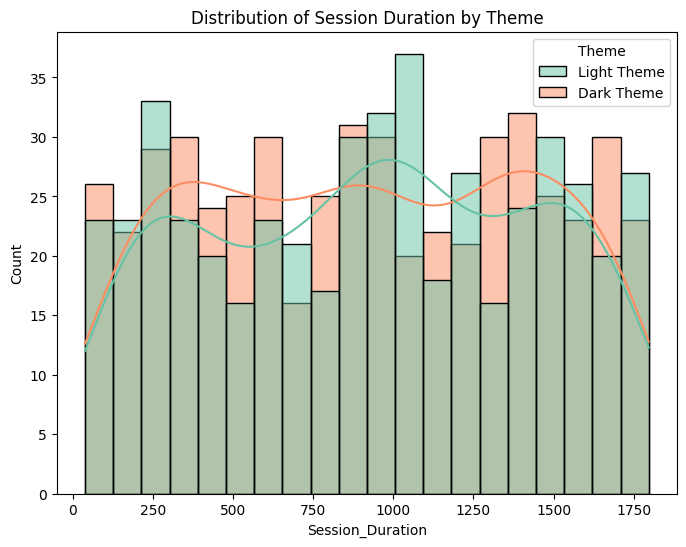

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Session_Duration', hue='Theme', kde=True, bins=20, palette='Set2')
plt.title("Distribution of Session Duration by Theme")
plt.ylabel("Count")
plt.show()

### Distribution Analysis and Statistical Testing Approach

The histogram and KDE plot of **Session Duration**  indicate that the data is not normally distributed.  

Due to the lack of a normal distribution, the “Mann-Whitney U-test” will be used instead of the two-sample t-test. The Mann-Whitney U-test is a nonparametric statistical test that compares the medians of two independent groups without assuming a normal distribution.

In [31]:
light_sessions  = df[df['Theme'] == 'Light Theme']['Session_Duration']
dark_sessions  = df[df['Theme'] == 'Dark Theme']['Session_Duration']

### Mann-Whitney U Test for Session Duration by Theme
Performing a Mann-Whitney U-test to compare session duration between Light and Dark theme users.

A low p-value indicates a statistically significant difference in session duration between two themes.

In [ ]:
light_theme = df[df['Theme'] == 'Light Theme']['Session_Duration']
dark_theme = df[df['Theme'] == 'Dark Theme']['Session_Duration']

t_stat, p_value = mannwhitneyu(light_theme, dark_theme, alternative='two-sided')

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 126545.5000
P-value: 0.7189


In [34]:
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis (H0): {H0}")
    print(f"Conclusion: {H1}")
else:
    print(f"Fail to reject the null hypothesis (H0): {H0}")
    print("Conclusion: No significant difference detected.")


Fail to reject the null hypothesis (H0): Session duration is the same for both themes.
Conclusion: No significant difference detected.


### Interpretation of Results

The Mann-Whitney U test yielded a p-value of 0.7189, which is much higher than the common significance threshold of 0.05. Therefore, we fail to reject the null hypothesis that the session duration is the same for users of both Light and Dark website themes

**Practical Implications:**  
From a website design perspective, this suggests that choosing between a Light or Dark theme may not influence the length of user sessions. Designers might prioritize other factors such as user preference, accessibility, or aesthetics when deciding on the theme, as session duration appears unaffected.  